In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
print(engine)

Engine(sqlite:///Resources/hawaii.sqlite)


In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect = True)

In [7]:
print(Base)

<class 'sqlalchemy.ext.automap.Base'>


In [8]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [9]:
# Save references to each table
Measurement = Base.classes.measurement

# 2nd table

Station = Base.classes.station


In [12]:
print(Station)

<class 'sqlalchemy.ext.automap.station'>


In [13]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [ ]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 

In [24]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(most_recent[0])

2017-08-23


In [26]:
# Calculate the date one year from the last date in data set.
previous_year = dt.date(2017,8,23) - dt.timedelta(days = 365)
print(previous_year)

2016-08-23


In [81]:
# Perform a query to retrieve the data and precipitation scores
prcp = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date >= previous_year).\
    order_by(Measurement.date).all()

print(prcp)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

In [44]:
# Save the query results as a Pandas DataFrame 
prcp_df = pd.DataFrame(prcp, columns=['date', 'prcp'])
prcp_df.head()

,date,prcp
0,2016-08-23,0.00
1,2016-08-23,0.15
2,2016-08-23,0.05
3,2016-08-23,NaN
4,2016-08-23,0.02


In [61]:
#set the index to the date column
#prcp_df.set_index('date',inplace = True) 

prcp_df.tail()

,prcp
date,
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.08
2017-08-23,0.45


In [60]:
# Sort the dataframe by date
sort_prcp = prcp_df.sort_values(by=['date'])

sort_prcp.tail()

,prcp
date,
2017-08-22,0.50
2017-08-23,0.08
2017-08-23,0.00
2017-08-23,0.00
2017-08-23,0.45


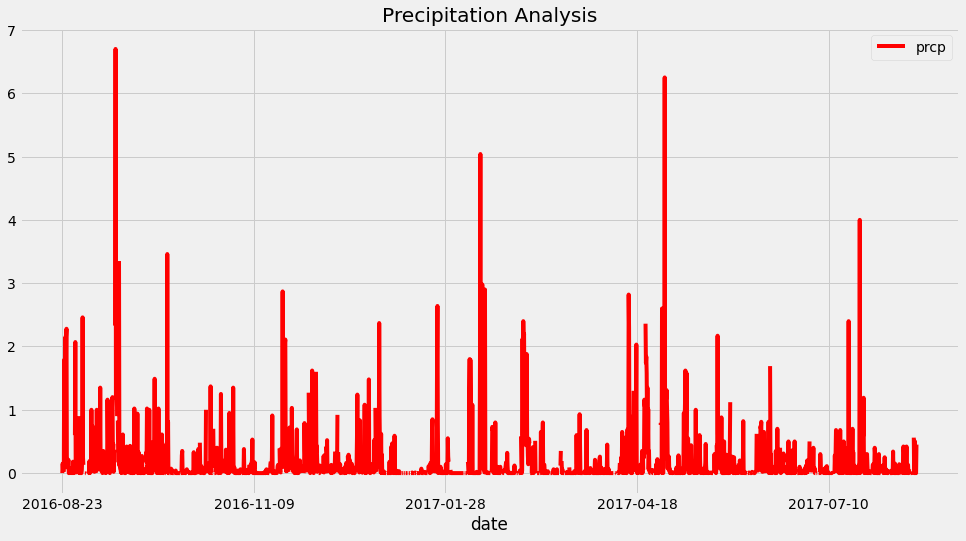

In [73]:
# Use Pandas Plotting with Matplotlib to plot the data
sort_prcp.plot(title = 'Precipitation Analysis', figsize = (15,8), color='red')
plt.legend()

#save fig 
#plt.savefig('Images/prcp_fig/png')

#show plot
plt.show()


In [78]:
# Use Pandas to calcualte the summary statistics for the precipitation data
sort_prcp.describe().round(5)


,prcp
count,2021.00000
mean,0.17728
std,0.46119
min,0.00000
25%,0.00000
50%,0.02000
75%,0.13000
max,6.70000


# Exploratory Station Analysis

In [79]:
# Design a query to calculate the total number stations in the dataset
total_stations = session.query(Measurement.station).distinct().count()

total_stations

9

In [100]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

active_stations = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station)

most_act_station= active_stations.order_by(func.count(Measurement.station).desc()).all()

most_act_station[:]

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [111]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
cal = [func.min(Measurement.tobs), 
       func.max(Measurement.tobs), 
       func.avg(Measurement.tobs)]
temp_cal = session.query(*cal).filter(Measurement.station =='USC00519281').all()
print(temp_cal[0])

(54.0, 85.0, 71.66378066378067)


In [119]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
temp = session.query(Measurement.tobs).filter(Measurement.date >= previous_year).filter(Measurement.station == 'USC00519281')

order_temp = temp.order_by(Measurement.date).all()

#order_temp

#save the query as pd df
temp_df = pd.DataFrame(order_temp, columns=['observed temp'])
temp_df.head()


,observed temp
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0


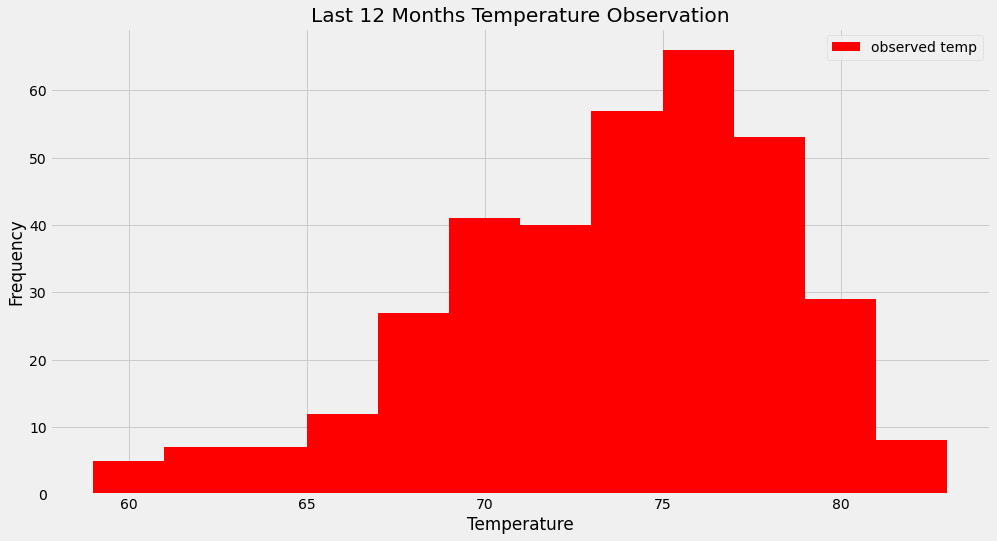

In [135]:
#histogram
temp_df.plot.hist(bins = 12, title = "Last 12 Months Temperature Observation", figsize=(15,8), color='red')

#labels
plt.xlabel('Temperature')

#save fig in images folder 
plt.savefig('Images/temp_vs_frequency.png')

#show graph
plt.show()

# Close session

In [136]:
# Close Session
session.close()